<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Business Challenge </h1>
Team 2 - Hult International Business School<br>

Sreekar Bathula,<br> Jose Alberto Valencia Carrillo,<br> Ekaterina Karpova,<br> Akoh Jackson,<br> Omoikhefe Lecky-Jeffrey Aienloshan<br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />


<h1>OVERVIEW</h1>

1.- The way we clean our data influences a lot the prediction for passengers. We developed our model using the average in general but once our score plateaued, we moved on to other methods. In this case, using a fast and simple way of filling in the missing values was quite effective. Compared to using mean or median, we decided to use the 'ffill' method. Ultimately, we jumped 5% in the Kaggle score just by changing the way we handle missing values.<br><br>

2.-From all the variables, the use of cryosleep was the one with a higher correlation. This means that those passengers had a higher chance of getting transported compared to those awake. Only 35% of passengers decided to use this method during the trip but those who did avoid getting lost in a different dimension. Additionally, those passengers who didn't ask for room service also had more changed of reaching their destination which is related to cryosleep since a person sleeping cant order food.  For future trip, it would be recommended to passengers to take cryosleep always when it is possible for them<br><br>

3.-The most effective machine learning model for the team approach was the use of a Histogram Gradient Boosting Classifier. This is an upgraded version of the basic Gradient Boosting Classifier that was tuned to have the highest accuracy possible. In this particular case, having a smaller gap between the Train and Test sets resulted in worst performance than having a smaller gap. In order to further improve the model, better tuning is required adding more parameters to the hyper tuning. Overall, getting an accuracy score higher than 0.81 will result in better and better placement in the competition.<br><br>  


<h1>Introduction</h1>

The goal of the competition is to use machine learning techniques to predict which passengers were transported to an alternate dimension. The outcomes should be based on the demographics, ticket information and from which spot of the spaceship they were teleported. Participants are provided with a dataset containing information about each passenger, such as their age, gender, class, and whether they were transported or not to an alternate dimension. <br><br>
Using this dataset, participants create machine learning models that can predict whether a passenger was teleported or not. The competition provides an opportunity for data science beginners to practice their skills and for experienced practitioners to test their models against others in the community. The competition is judged based on the accuracy of the model's predictions on a test dataset, with the top performers being ranked on the leaderboard.


Below is a starter code that comes with Jupyter Notebook.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>
You will need to import any additional libraries. It's also a good idea to get rid of the cell above once you're used to Jupyter Notebook in Kaggle.<br>

In [2]:
# modeling library
import sklearn.linear_model                          # linear modeling in scikit-learn

# other model building tools
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import roc_auc_score            # auc score

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn 


# importing libraries
import pandas            as pd                       # data science essentials
import numpy             as np
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
import statsmodels.formula.api as smf                # statsmodel regressions
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.model_selection import GridSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm

# CART model packages
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
#from sklearn.externals.six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend
#import pydotplus                                     # interprets dot objects

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.model_selection import RandomizedSearchCV

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br><br>
Make sure to tell Python the path to your training data. If you have no idea what a path is, look to the left and find and hover over <em>Data&nbsp;>&nbsp;Input&nbsp;>&nbsp;spaceship-titanic</em>. A button should appear allowing you to copy the path to your clipboard.<br>

In [3]:
# importing the training dataset
path             = "./" 
training_dataset = "train.csv"


#Reading the data from excel

# specifying the path and file name
file = 'train.csv'

# reading the file into Python
data_train=pd.read_csv(file)


## Understanding the data

Before applying any testing, the exploratory analysis of the datasets showed the structure and values available in the dataset from a visual perspective (NIST, 2021). For the training dataset, we found a total of 8,693 data entries allocated in 14 different columns, 7 of those columns contained categorical information, 6 of them numerical information and 1(transported) contained a true or false value. It was necessary to apply a methodology to account for the missing since in total they constituted 24% of the whole set. Finally, went through the same process in the test dataset resulting in similar findings.

In [4]:
# data_train.head(2)

In [5]:
# # formatting and printing the dimensions of the dataset
# print(f"""
# Size of Original Dataset
# ------------------------
# Observations: {data_train.shape[0]}
# Features:     {data_train.shape[1]}
# """)

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


## Cleaning the data

To account for the missing values, the team took 2 different approaches and compared the results. The first method to try was to delete the rows containing the missing information but we had a significant amount of information. The second methodology was to replace the empty space with Mean, Median, or Mode (Towards Data Science, 2020). Lastly, we replace the missing information with the last correct value using the method  “ffill’ from .fillna() in pandas. Finally, when establishing a baseline, the method with the best result was .fillna().

In [7]:
# Check for missing values in each column
missing_values = data_train.isnull().sum()

# Print the missing values
print(missing_values)


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [8]:
#most_common_value = data_train['HomePlanet'].mode()[0]              #Text
#data_train['HomePlanet'].fillna(most_common_value, inplace=True)

#most_common_value = data_train['CryoSleep'].value_counts().idxmax() #Bool
#data_train['CryoSleep'].fillna(most_common_value, inplace=True)

#most_common_value = data_train['Deck'].mode()[0]                  
#data_train['Deck'].fillna(most_common_value, inplace=True)

#most_common_value = data_train['Side'].mode()[0]                  
#data_train['Side'].fillna(most_common_value, inplace=True)

#most_common_value = data_train['Destination'].mode()[0]
#data_train['Destination'].fillna(most_common_value, inplace=True)

#data_train['Age'].fillna(data_train['Age'].mean(), inplace=True)

#most_common_value = data_train['VIP'].value_counts().idxmax()
#data_train['VIP'].fillna(most_common_value, inplace=True)

#data_train['RoomService'].fillna(data_train['RoomService'].median(), inplace=True)

#data_train['FoodCourt'].fillna(data_train['FoodCourt'].median(), inplace=True)

#data_train['ShoppingMall'].fillna(data_train['ShoppingMall'].median(), inplace=True)

#data_train['Spa'].fillna(data_train['Spa'].median(), inplace=True)

#data_train['VRDeck'].fillna(data_train['VRDeck'].median(), inplace=True)

#data_train['Num'].fillna(data_train['VRDeck'].median(), inplace=True)

In [9]:
data_train= data_train.fillna(method='ffill')

# # titanic_train.head(5)
# #titanic_train.shape
# data_train.info(verbose = True)

### Univariate Analysis

#### Home Planet

In [10]:
# data_train['HomePlanet'].value_counts()

The first feature to analyze is the origin of the passenger. This column is filled with 3 different values. The passengers coming from the earth are the vast majority with 54%. Those coming from Europa and mars are almost equally distributed with 25% and 20% respectively.   We can combine this feature with other values like destination to get additional information about each group of passengers.

<AxesSubplot:ylabel='HomePlanet'>

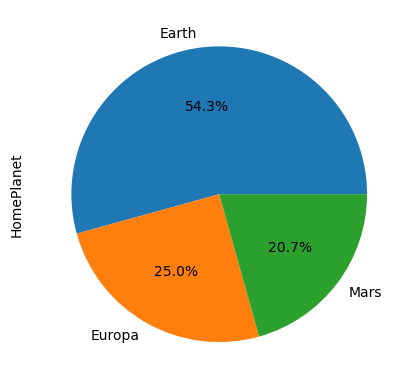

In [11]:
data_train.HomePlanet.value_counts().plot(kind='pie',autopct="%.1f%%")

In [12]:
# data_train['CryoSleep'].value_counts()

This feature is filled with boolean values (true or false). If a person is using the cryosleep system during their trip, they will appear as true. Over 60% of the passenger on this trip didn't use cryosleep. 

It is likely that those passengers with a longer trip will be using this method. A possible new feature can be drawn between the use of this method and the relation it has with the age or group of passengers. 

<AxesSubplot:ylabel='CryoSleep'>

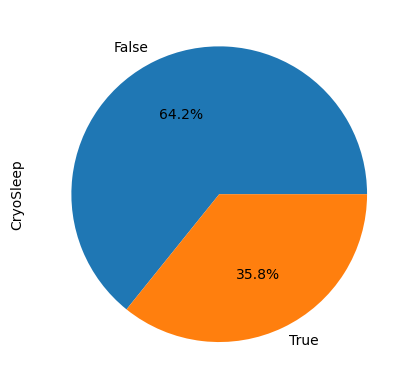

In [13]:
data_train.CryoSleep.value_counts().plot(kind='pie',autopct="%.1f%%")

In [14]:
 #data_train['Destination'].value_counts()

In [15]:
 #data_train.Destination.value_counts().plot(kind='pie',autopct="%.1f%%")

In [16]:
# data_train['VIP'].value_counts()

In [17]:
# data_train.VIP.value_counts().plot(kind='pie',autopct="%.1f%%")

#### Age 

In [18]:
a=data_train['Age']
#Descriptive statistics for thhe column Avg_mean_rating
count_value=a.count() #Count of values
min_value= a.min() #Minimum value
max_value=a.max() #Maximum value
mean_value=a.mean() #Mean
median_value=a.median() #Median
mode_value=a.mode() #Mode
variance_val=a.var() #Variance
std_value=a.std() #standard deviation
q25_value=a.quantile(0.25) #IQR
q50_value=a.quantile(0.50)
q75_value=a.quantile(0.75)
data_type=a.dtype #Data type
skew_value=a.skew() #Skewness
kurt_value=a.kurt() #Kurtosis

# #Printing all the required statistical data
# print(f'''
# AVG_MEAN_RATING
# ---------------------
# data type:{data_type}
# count:    {count_value}

# min:      {min_value}
# max:      {max_value}

# mean:     {mean_value}
# median:   {median_value}
# mode:     {mode_value[0]}

# variance: {variance_val}
# Std Devn: {std_value}

# Skewness: {skew_value}
# Kurtosis: {kurt_value}

# IQR 25%:  {q25_value}
# IQR 50%:  {q50_value}
# IQR 75%:  {q75_value}
# ''')

In [19]:
# # #Plotting a histogram
# plt.figure(figsize=(8,4))
# a.hist()
# plt.xlabel('Age')
# plt.ylabel('Count')

# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

In [20]:
# # #Plottting a kde
# sns.kdeplot(a)
# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

#### Room Service

In [21]:
a=data_train['RoomService']
#Descriptive statistics for thhe column Avg_mean_rating
count_value=a.count() #Count of values
min_value= a.min() #Minimum value
max_value=a.max() #Maximum value
mean_value=a.mean() #Mean
median_value=a.median() #Median
mode_value=a.mode() #Mode
variance_val=a.var() #Variance
std_value=a.std() #standard deviation
q25_value=a.quantile(0.25) #IQR
q50_value=a.quantile(0.50)
q75_value=a.quantile(0.75)
data_type=a.dtype #Data type
skew_value=a.skew() #Skewness
kurt_value=a.kurt() #Kurtosis

##Printing all the required statistical data
# print(f'''
# AVG_MEAN_RATING
# ---------------------
# data type:{data_type}
# count:    {count_value}

# min:      {min_value}
# max:      {max_value}

# mean:     {mean_value}
# median:   {median_value}
# mode:     {mode_value[0]}

# variance: {variance_val}
# Std Devn: {std_value}

# Skewness: {skew_value}
# Kurtosis: {kurt_value}

# IQR 25%:  {q25_value}
# IQR 50%:  {q50_value}
# IQR 75%:  {q75_value}
# ''')

In [22]:
# # #Plotting a histogram
# plt.figure(figsize=(8,4))
# a.hist()
# plt.xlabel('Age')
# plt.ylabel('Count')

# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

In [23]:
# # #Plottting a kde
# sns.kdeplot(a)
# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

#### FoodCourt

In [24]:
a=data_train['RoomService']
#Descriptive statistics for thhe column Avg_mean_rating
count_value=a.count() #Count of values
min_value= a.min() #Minimum value
max_value=a.max() #Maximum value
mean_value=a.mean() #Mean
median_value=a.median() #Median
mode_value=a.mode() #Mode
variance_val=a.var() #Variance
std_value=a.std() #standard deviation
q25_value=a.quantile(0.25) #IQR
q50_value=a.quantile(0.50)
q75_value=a.quantile(0.75)
data_type=a.dtype #Data type
skew_value=a.skew() #Skewness
kurt_value=a.kurt() #Kurtosis

# #Printing all the required statistical data
# print(f'''
# AVG_MEAN_RATING
# ---------------------
# data type:{data_type}
# count:    {count_value}

# min:      {min_value}
# max:      {max_value}

# mean:     {mean_value}
# median:   {median_value}
# mode:     {mode_value[0]}

# variance: {variance_val}
# Std Devn: {std_value}

# Skewness: {skew_value}
# Kurtosis: {kurt_value}

# IQR 25%:  {q25_value}
# IQR 50%:  {q50_value}
# IQR 75%:  {q75_value}
# ''')

In [25]:
# #Plotting a histogram
# plt.figure(figsize=(8,4))
# a.hist()
# plt.xlabel('RoomService')
# plt.ylabel('Count')

# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

In [26]:
#Plottting a kde
# sns.kdeplot(a)
# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

In [27]:
a=data_train['FoodCourt']
#Descriptive statistics for thhe column Avg_mean_rating
count_value=a.count() #Count of values
min_value= a.min() #Minimum value
max_value=a.max() #Maximum value
mean_value=a.mean() #Mean
median_value=a.median() #Median
mode_value=a.mode() #Mode
variance_val=a.var() #Variance
std_value=a.std() #standard deviation
q25_value=a.quantile(0.25) #IQR
q50_value=a.quantile(0.50)
q75_value=a.quantile(0.75)
data_type=a.dtype #Data type
skew_value=a.skew() #Skewness
kurt_value=a.kurt() #Kurtosis

# #Printing all the required statistical data
# print(f'''
# AVG_MEAN_RATING
# ---------------------
# data type:{data_type}
# count:    {count_value}

# min:      {min_value}
# max:      {max_value}

# mean:     {mean_value}
# median:   {median_value}
# mode:     {mode_value[0]}

# variance: {variance_val}
# Std Devn: {std_value}

# Skewness: {skew_value}
# Kurtosis: {kurt_value}

# IQR 25%:  {q25_value}
# IQR 50%:  {q50_value}
# IQR 75%:  {q75_value}
# ''')

In [28]:
#Plotting a histogram
# plt.figure(figsize=(8,4))
# a.hist()
# plt.xlabel('FoodCourt')
# plt.ylabel('Count')

# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

In [29]:
# #Plottting a kde
# sns.kdeplot(a)
# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

#### Shopping Mall

In [30]:
a=data_train['ShoppingMall']
#Descriptive statistics for thhe column Avg_mean_rating
count_value=a.count() #Count of values
min_value= a.min() #Minimum value
max_value=a.max() #Maximum value
mean_value=a.mean() #Mean
median_value=a.median() #Median
mode_value=a.mode() #Mode
variance_val=a.var() #Variance
std_value=a.std() #standard deviation
q25_value=a.quantile(0.25) #IQR
q50_value=a.quantile(0.50)
q75_value=a.quantile(0.75)
data_type=a.dtype #Data type
skew_value=a.skew() #Skewness
kurt_value=a.kurt() #Kurtosis

# #Printing all the required statistical data
# print(f'''
# AVG_MEAN_RATING
# ---------------------
# data type:{data_type}
# count:    {count_value}

# min:      {min_value}
# max:      {max_value}

# mean:     {mean_value}
# median:   {median_value}
# mode:     {mode_value[0]}

# variance: {variance_val}
# Std Devn: {std_value}

# Skewness: {skew_value}
# Kurtosis: {kurt_value}

# IQR 25%:  {q25_value}
# IQR 50%:  {q50_value}
# IQR 75%:  {q75_value}
# ''')

In [31]:
# #Plotting a histogram
# plt.figure(figsize=(8,4))
# a.hist()
# plt.xlabel('Shopping Mall')
# plt.ylabel('Count')

# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

In [32]:
# #Plottting a kde
# sns.kdeplot(a)
# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

#### SPA

In [33]:
a=data_train['Spa']
#Descriptive statistics for thhe column Avg_mean_rating
count_value=a.count() #Count of values
min_value= a.min() #Minimum value
max_value=a.max() #Maximum value
mean_value=a.mean() #Mean
median_value=a.median() #Median
mode_value=a.mode() #Mode
variance_val=a.var() #Variance
std_value=a.std() #standard deviation
q25_value=a.quantile(0.25) #IQR
q50_value=a.quantile(0.50)
q75_value=a.quantile(0.75)
data_type=a.dtype #Data type
skew_value=a.skew() #Skewness
kurt_value=a.kurt() #Kurtosis

#Printing all the required statistical data
# print(f'''
# AVG_MEAN_RATING
# ---------------------
# data type:{data_type}
# count:    {count_value}

# min:      {min_value}
# max:      {max_value}

# mean:     {mean_value}
# median:   {median_value}
# mode:     {mode_value[0]}

# variance: {variance_val}
# Std Devn: {std_value}

# Skewness: {skew_value}
# Kurtosis: {kurt_value}

# IQR 25%:  {q25_value}
# IQR 50%:  {q50_value}
# IQR 75%:  {q75_value}
# ''')

In [34]:
#Plotting a histogram
# plt.figure(figsize=(8,4))
# a.hist()
# plt.xlabel('Spa')
# plt.ylabel('Count')

# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

In [35]:
# #Plottting a kde
# sns.kdeplot(a)
# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

#### VRDeck

In [36]:
a=data_train['VRDeck']
#Descriptive statistics for thhe column Avg_mean_rating
count_value=a.count() #Count of values
min_value= a.min() #Minimum value
max_value=a.max() #Maximum value
mean_value=a.mean() #Mean
median_value=a.median() #Median
mode_value=a.mode() #Mode
variance_val=a.var() #Variance
std_value=a.std() #standard deviation
q25_value=a.quantile(0.25) #IQR
q50_value=a.quantile(0.50)
q75_value=a.quantile(0.75)
data_type=a.dtype #Data type
skew_value=a.skew() #Skewness
kurt_value=a.kurt() #Kurtosis

# #Printing all the required statistical data
# print(f'''
# AVG_MEAN_RATING
# ---------------------
# data type:{data_type}
# count:    {count_value}

# min:      {min_value}
# max:      {max_value}

# mean:     {mean_value}
# median:   {median_value}
# mode:     {mode_value[0]}

# variance: {variance_val}
# Std Devn: {std_value}

# Skewness: {skew_value}
# Kurtosis: {kurt_value}

# IQR 25%:  {q25_value}
# IQR 50%:  {q50_value}
# IQR 75%:  {q75_value}
# ''')

In [37]:
# # #Plotting a histogram
# plt.figure(figsize=(8,4))
# a.hist()
# plt.xlabel('VRDeck')
# plt.ylabel('Count')

# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

In [38]:
# # #Plottting a kde
# sns.kdeplot(a)
# plt.axvline(mean_value,label='MEAN',color='red')
# plt.axvline(median_value,label='MEDIAN',color='blue')
# plt.axvline(mode_value[0],label='MODE',color='green')
# plt.legend()
# plt.show()

### Bi-Variate Analysis

In [39]:
# pd.crosstab(data_train['HomePlanet'], data_train['Destination'])

In [40]:
# plt.figure(figsize=(5,3))
# sns.catplot(x='HomePlanet', col='Destination', data=data_train, kind='count', height=4, aspect=0.5)
# plt.show()

In [41]:
# pd.crosstab(data_train['HomePlanet'], data_train['CryoSleep'])

In [42]:
# plt.figure(figsize=(5,3))
# sns.catplot(x='HomePlanet', col='CryoSleep', data=data_train, kind='count', height=4, aspect=0.5)
# plt.show()

In [43]:
# data_train.groupby('HomePlanet').sum()['FoodCourt']  # for target = 1

In [44]:
# plt.figure(figsize=(7,4))
# (data_train.groupby('HomePlanet').sum()['FoodCourt']).plot(kind='bar')

In [45]:
# plt.figure(figsize=(5,3))
# sns.catplot(x='HomePlanet', col='CryoSleep', data=data_train, kind='count', height=4, aspect=0.5)
# plt.show()

In [46]:
# data_train.groupby('HomePlanet').sum()['CryoSleep'] 

These graphs show the structure of 6 of the features present in the dataset. None of them has a normal distribution and in the vast majority, they are skewed to the right. For the section with the age, we can change the ranges of age to normalize the distribution.  Food court and spad are highly influenced by the first group of values. For the rest, we can consider using the median instead of the mean to fill in the missing values.

<Figure size 2000x1000 with 0 Axes>

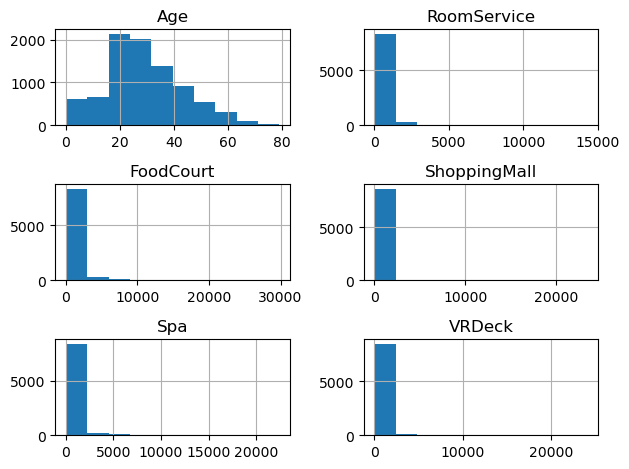

In [47]:
plt.figure(figsize=(20,10))
data_train.hist()
plt.tight_layout()
plt.show()

In [48]:
#sns.pairplot(data_train, hue='Transported')

## Feature Engineering

While creating new features or columns with information, the team started by transforming the information that was already existing in the dataset but structuring it in a way that the machine learning models were able to leverage it. This is called “One hot encoding” (w3schools) and in this way, we are able to get new numerical information from a column that previously was just text. As an example, we separated the “home planet” into 3 new columns (Earth, Mars, Europa). if the passenger came from any of these destinations then we get a 1 or 0 instead of just the name. Finally, we got 21 columns in total compared to the previous 14.

In [49]:

# split the "Cabin" column into three separate columns
data_train[['Deck', 'Num', 'Side']] = data_train['Cabin'].str.split('/', expand=True)

# remove the original "Cabin" column
data_train = data_train.drop(columns=['Cabin'])
#data_train = data_train.drop(columns=['PassengerId'])
data_train = data_train.drop(columns=['Name'])


# print the resulting dataframe
# data_train.head(2)

In [50]:
encoded_data = pd.get_dummies(data_train['HomePlanet'], prefix='HomePlanet',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_train = pd.concat([data_train, encoded_data], axis=1)

In [51]:
encoded_data = pd.get_dummies(data_train['CryoSleep'], prefix='CryoSleep',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_train = pd.concat([data_train, encoded_data], axis=1)

In [52]:
encoded_data = pd.get_dummies(data_train['Destination'], prefix='Destination',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_train = pd.concat([data_train, encoded_data], axis=1)

In [53]:
encoded_data = pd.get_dummies(data_train['VIP'], prefix='VIP',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_train = pd.concat([data_train, encoded_data], axis=1)

In [54]:
encoded_data = pd.get_dummies(data_train['Deck'], prefix='Deck',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_train = pd.concat([data_train, encoded_data], axis=1)

In [55]:
encoded_data = pd.get_dummies(data_train['Side'], prefix='Side',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_train = pd.concat([data_train, encoded_data], axis=1)

In [56]:
# remove the original "Cabin" column
data_train = data_train.drop(columns=['HomePlanet'])
data_train = data_train.drop(columns=['CryoSleep'])
data_train = data_train.drop(columns=['Destination'])
data_train = data_train.drop(columns=['VIP'])
data_train = data_train.drop(columns=['Deck'])
data_train = data_train.drop(columns=['Side'])

In [57]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data_train['Transported']=LE.fit_transform((data_train['Transported']))
# data_train.head(2)

In [58]:
#from sklearn.preprocessing import PowerTransformer
#PT_yj = PowerTransformer(method='yeo-johnson')

In [59]:
#data_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=PT_yj.fit_transform(data_train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])


In [60]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#data_train['Age']=ss.fit_transform(data_train[['Age']])
#data_train['RoomService']=ss.fit_transform(data_train[['RoomService']])
#data_train['FoodCourt']=ss.fit_transform(data_train[['FoodCourt']])
#data_train['ShoppingMall']=ss.fit_transform(data_train[['ShoppingMall']])
#data_train['Spa']=ss.fit_transform(data_train[['Spa']])
#data_train['VRDeck']=ss.fit_transform(data_train[['VRDeck']])

In [61]:
# data_train.head(2)

## Test Data

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
The test set is also available. Notice that there is no data for Transported (y-variable) in the test set. This is intentional.<br>

In [62]:
# importing the training dataset
#path             = "/kaggle/input/spaceship-titanic/" 
#training_dataset = "train.csv"


#Reading the data from excel

# specifying the path and file name
file = 'test.csv'

# reading the file into Python
data_test=pd.read_csv(file)

In [63]:
import pandas as pd

# split the "Cabin" column into three separate columns
data_test[['Deck', 'Num', 'Side']] = data_test['Cabin'].str.split('/', expand=True)

# remove the original "Cabin" column
data_test = data_test.drop(columns=['Cabin'])
#data_test = data_test.drop(columns=['PassengerId'])
data_test = data_test.drop(columns=['Name'])


# print the resulting dataframe
# data_test.head(2)

In [64]:
#most_common_value = data_test['HomePlanet'].mode()[0]              #Text
#data_test['HomePlanet'].fillna(most_common_value, inplace=True)

#most_common_value = data_test['CryoSleep'].value_counts().idxmax() #Bool
#data_test['CryoSleep'].fillna(most_common_value, inplace=True)

#most_common_value = data_test['Deck'].mode()[0]                  
#data_test['Deck'].fillna(most_common_value, inplace=True)

#most_common_value = data_test['Side'].mode()[0]                  
#data_test['Side'].fillna(most_common_value, inplace=True)

#most_common_value = data_test['Destination'].mode()[0]
#data_test['Destination'].fillna(most_common_value, inplace=True)

#data_test['Age'].fillna(data_test['Age'].mean(), inplace=True)

#most_common_value = data_test['VIP'].value_counts().idxmax()
#data_test['VIP'].fillna(most_common_value, inplace=True)

#data_test['RoomService'].fillna(data_test['RoomService'].median(), inplace=True)

#data_test['FoodCourt'].fillna(data_test['FoodCourt'].median(), inplace=True)

#data_test['ShoppingMall'].fillna(data_test['ShoppingMall'].median(), inplace=True)

#data_test['Spa'].fillna(data_test['Spa'].median(), inplace=True)

#data_test['VRDeck'].fillna(data_test['VRDeck'].median(), inplace=True)

#data_test['Num'].fillna(data_test['VRDeck'].median(), inplace=True)

data_train.fillna(method='ffill');
# titanic_train.head(5)
#titanic_train.shape


In [65]:
encoded_data = pd.get_dummies(data_test['HomePlanet'], prefix='HomePlanet',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_test = pd.concat([data_test, encoded_data], axis=1)

In [66]:
encoded_data = pd.get_dummies(data_test['CryoSleep'], prefix='CryoSleep',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_test = pd.concat([data_test, encoded_data], axis=1)

In [67]:
encoded_data = pd.get_dummies(data_test['Destination'], prefix='Destination',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_test = pd.concat([data_test, encoded_data], axis=1)

In [68]:
encoded_data = pd.get_dummies(data_test['VIP'], prefix='VIP',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_test = pd.concat([data_test, encoded_data], axis=1)

In [69]:
encoded_data = pd.get_dummies(data_test['Deck'], prefix='Deck',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_test = pd.concat([data_test, encoded_data], axis=1)

In [70]:
encoded_data = pd.get_dummies(data_test['Side'], prefix='Side',drop_first=True)

# Add the one-hot encoded columns to the original DataFrame
data_test = pd.concat([data_test, encoded_data], axis=1)

In [71]:
# remove the original "Cabin" column
data_test = data_test.drop(columns=['HomePlanet'])
data_test = data_test.drop(columns=['CryoSleep'])
data_test = data_test.drop(columns=['Destination'])
data_test = data_test.drop(columns=['VIP'])
data_test = data_test.drop(columns=['Deck'])
data_test = data_test.drop(columns=['Side'])

In [72]:
#from sklearn.preprocessing import PowerTransformer
#PT_yj = PowerTransformer(method='yeo-johnson')

In [73]:
#data_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=PT_yj.fit_transform(data_test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])


In [74]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#data_test['Age']=ss.fit_transform(data_test[['Age']])
#data_test['RoomService']=ss.fit_transform(data_test[['RoomService']])
#data_test['FoodCourt']=ss.fit_transform(data_test[['FoodCourt']])
#data_test['ShoppingMall']=ss.fit_transform(data_test[['ShoppingMall']])
#data_test['Spa']=ss.fit_transform(data_test[['Spa']])
#data_test['VRDeck']=ss.fit_transform(data_test[['VRDeck']])

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
You may want to join the datasets together before feature engineering. This will help make things more efficient.<br>

In [75]:
data_train['set'] = 'Training'
data_test ['set'] = 'Testing'

# concatenating both datasets together for mv and feature engineering
titanic_df = data_train.append(other = data_test)

# resetting index to avoid problems later in the code
titanic_df.reset_index(drop = False,
                       inplace = True)

In [76]:
# data_test.head(5)

In [77]:
# titanic_df.info()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Let's look at correlations to find an x-variable to model with.<br>

Then to generate the result of the correlation between each variable, the column Transported is set as the dependent variable(the one affected by the rest). The remaining 20 variables are considered as independent variables  (the ones affecting ‘transported’). The result is a list with the percentage of influence that each column has on the result we want.  At the top, we have if a person is using cryosleep with the most influence, followed by the use of room service and the use of the spa. The variables with the weakest correlations were the destination PSO_j318, the deck_T, and visits to the shopping mall.

In [78]:
# instantiating a correlation matrix
titanic_corr = data_train.corr(method = 'pearson').round(decimals = 4)

# transforming correlations to absolute values
titanic_corr_Result = titanic_corr.loc[ : , 'Transported' ].apply(func = abs).sort_values(ascending = False).round(decimals = 4)
print(titanic_corr_Result)

Transported                 1.000000
CryoSleep_True              0.456100
RoomService                 0.241300
Spa                         0.217200
VRDeck                      0.204800
HomePlanet_Europa           0.179800
Deck_B                      0.144300
Deck_C                      0.107500
Side_S                      0.103100
Deck_E                      0.096600
Destination_TRAPPIST-1e     0.096600
Deck_F                      0.090100
Age                         0.074200
FoodCourt                   0.046000
VIP_True                    0.034600
Deck_D                      0.034300
HomePlanet_Mars             0.019600
Deck_G                      0.017300
Deck_T                      0.014600
ShoppingMall                0.010200
Destination_PSO J318.5-22   0.000800
Name: Transported, dtype: float64


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Since training and testing sets have already been developed for us, we can simply select the X-features we want to model with and we're good to go.<br>

In [79]:

# imputing in missing values for RoomService
#titanic_df[ 'RoomService' ].fillna(value = 0, inplace = True)

# setting explanatory variable(s) with most correlated x-variable
x_train = titanic_df[ ['CryoSleep_True','Spa','RoomService','VRDeck','ShoppingMall','FoodCourt','HomePlanet_Europa','Deck_B','Deck_C','Side_S','Destination_TRAPPIST-1e','Deck_E','Deck_F','Age','VIP_True','Deck_D','HomePlanet_Mars','Deck_G','Deck_T','Destination_PSO J318.5-22'] ][ titanic_df['set'] == 'Training' ]
#x_train = titanic_df[ ['CryoSleep_True','Spa','RoomService'] ][ titanic_df['set'] == 'Training' ]

# setting response variable
y_train = titanic_df[ 'Transported' ][ titanic_df['set']   == 'Training' ]

## Multivariate Analysis

In [80]:
#plt.figure(figsize=(20,10))
#titanic_df.hist()
#plt.tight_layout()
#plt.show()

In [81]:
#sns.pairplot(titanic_df, hue='Transported')

In [82]:
# titanic_df.corr()

In [83]:
# sns.heatmap(titanic_df.corr(), annot = True, linewidths=.5, center=0)

# # rotation = 'horizontal' rotates the y-axis labels horizontally
# # set text size using 'fontsize'
# plt.yticks(rotation = 'horizontal', fontsize = 15)
# plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
# plt.show()

In [84]:
# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
#sns.heatmap(titanic_df[np.abs(titanic_df > 0.25), annot = True,linewidths=0.5, annot_kws = {"size": 11})

# rotate the y-axis labels
# set text size using 'fontsize'
#plt.yticks(rotation = 'horizontal', fontsize = 15)
#plt.xticks(rotation = 'vertical',fontsize = 15)

# display the plot
#plt.show()

In [85]:

# developing training and validation sets
x_train_1, x_train_2, y_train_1, y_train_2 = train_test_split(
            x_train,
            y_train.astype(dtype = 'int'),
            random_state = 123,
            test_size    = 0.25,
            stratify     = y_train)

## Logistic Regression

In [86]:
# from sklearn.linear_model import LogisticRegression
# model_name = "Logistic Regression"


# # INSTANTIATING a model object - CHANGE THIS AS NEEDED
# model = LogisticRegression(C=2.5, 
#                            max_iter=200, 
#                            solver='newton-cg')



# # FITTING to the training data
# model_fit = model.fit(x_train_1, y_train_1)


# # PREDICTING on the response variable
# model_train_pred = model_fit.predict(x_train_1)
# model_valid_pred = model_fit.predict(x_train_2)


# # SCORING the results (accuracy)
# model_train_score = model.score(x_train_1, y_train_1).round(4) # training accuracy
# model_valid_score = model.score(x_train_2, y_train_2).round(4) # validation accuracy

# # SCORING the results (auc)
# model_train_auc = roc_auc_score(y_true  = y_train_1,
#                                 y_score = model_train_pred).round(decimals = 4)

# model_valid_auc = roc_auc_score(y_true  = y_train_2,
#                                 y_score = model_valid_pred).round(decimals = 4)

# # displaying results
# print('Training Accuracy:  ', model_train_score)
# print('Validation Accuracy:', model_valid_score)
# print('Training AUC:       ', model_train_auc)
# print('Validation AUC:     ', model_valid_auc)

## Ridge Classifier

In [87]:
# from sklearn.linear_model import RidgeClassifier

# model_name = "Ridge Classifier"

# # INSTANTIATING a model object - CHANGE THIS AS NEEDED
# model = RidgeClassifier(alpha=3.0, 
#                         normalize=True,
#                         solver= 'cholesky')

# # FITTING to the training data
# model_fit = model.fit(x_train_1, y_train_1)

# # PREDICTING on the response variable
# model_train_pred = model_fit.predict(x_train_1)
# model_valid_pred = model_fit.predict(x_train_2)

# # SCORING the results (accuracy)
# model_train_score = model.score(x_train_1, y_train_1).round(4) # training accuracy
# model_valid_score = model.score(x_train_2, y_train_2).round(4) # validation accuracy

# # SCORING the results (auc)
# model_train_auc = roc_auc_score(y_true  = y_train_1,
#                                 y_score = model_train_pred).round(decimals = 4)

# model_valid_auc = roc_auc_score(y_true  = y_train_2,
#                                 y_score = model_valid_pred).round(decimals = 4)

# # displaying results
# print('Training Accuracy:  ', model_train_score)
# print('Validation Accuracy:', model_valid_score)
# print('Training AUC:       ', model_train_auc)
# print('Validation AUC:     ', model_valid_auc)

## KNeighbors best

In [88]:
# from sklearn.neighbors import KNeighborsClassifier

# # picking a model name
# model_name = "KNeighbors Classifier"


# # INSTANTIATING a model object - CHANGE THIS AS NEEDED
# model = KNeighborsClassifier(n_neighbors = 25,
#                              weights     = 'uniform',
#                              algorithm   = 'auto', 
#                              leaf_size   = 3)


# # FITTING to the training data
# model_fit = model.fit(x_train_1, y_train_1)


# # PREDICTING on the response variable
# model_train_pred = model_fit.predict(x_train_1)
# model_valid_pred = model_fit.predict(x_train_2)


# # SCORING the results (accuracy)
# model_train_score = model.score(x_train_1, y_train_1).round(4) # training accuracy
# model_valid_score = model.score(x_train_2, y_train_2).round(4) # validation accuracy

# # SCORING the results (auc)
# model_train_auc = roc_auc_score(y_true  = y_train_1,
#                                 y_score = model_train_pred).round(decimals = 4)

# model_valid_auc = roc_auc_score(y_true  = y_train_2,
#                                 y_score = model_valid_pred).round(decimals = 4)

# # displaying results
# print('Training Accuracy:  ', model_train_score)
# print('Validation Accuracy:', model_valid_score)
# print('Training AUC:       ', model_train_auc)
# print('Validation AUC:     ', model_valid_auc)

## Gradient Boosting Classifier

In [89]:
# from sklearn.ensemble import GradientBoostingClassifier
# # picking a model name
# model_name = "Gradient Boosting Classifier"


# # INSTANTIATING a model object - CHANGE THIS AS NEEDED
# model = GradientBoostingClassifier(loss             = 'exponential',   
#                                    learning_rate    = 0.3, 
#                                    n_estimators     = 100, 
#                                    max_depth        = 3,
#                                    min_samples_leaf = 10,
#                                    random_state     = 219)


# # FITTING to the training data
# model_fit = model.fit(x_train_1, y_train_1)


# # PREDICTING on the response variable
# model_train_pred = model_fit.predict(x_train_1)
# model_valid_pred = model_fit.predict(x_train_2)


# # SCORING the results (accuracy)
# model_train_score = model.score(x_train_1, y_train_1).round(4) # training accuracy
# model_valid_score = model.score(x_train_2, y_train_2).round(4) # validation accuracy

# # SCORING the results (auc)
# model_train_auc = roc_auc_score(y_true  = y_train_1,
#                                 y_score = model_train_pred).round(decimals = 4)

# model_valid_auc = roc_auc_score(y_true  = y_train_2,
#                                 y_score = model_valid_pred).round(decimals = 4)

# # displaying results
# print('Training Accuracy:  ', model_train_score)
# print('Validation Accuracy:', model_valid_score)
# print('Training AUC:       ', model_train_auc)
# print('Validation AUC:     ', model_valid_auc)

#Pre
#learning_rate    = 0.1,  n_estimators     = 300, max_depth        = 6, min_samples_leaf = 4, random_state     = 219)
# Training Accuracy:   0.9261
# Validation Accuracy: 0.8045
# Training AUC:        0.9258
# Validation AUC:      0.8044


#Tuned
#loss  = 'exponential',   learning_rate    = 0.3, n_estimators     = 100, max_depth        = 3,min_samples_leaf = 10,random_state     = 219
# Training Accuracy:   0.8296
# Validation Accuracy: 0.804
# Training AUC:        0.8294
# Validation AUC:      0.8037

## Histogram Gradient Boosting Classifier

After testing 14 different models in the basic form and after tuning, the model with the best score was the Gradient Boosting model.  This model outperformed the other models in training AUC but had a small variation between the training and validation scores.

When submitting the score to Kaggle, the outcome was positive but the tuning wasn't able to overcome a score of 0.7850 even after hyper tuning. Ultimately, the team considered an alternative version of this model called Histogram-based Gradient Boosting (Machine Learning Mastery, 2020).  The final result was a model with an accuracy of 81%, having a moderated gap between the train and the validation of just 5%. In other words, it was a model that performed well and was stable enough for us to keep testing.

In [90]:
from sklearn.ensemble import HistGradientBoostingClassifier
# # picking a model name
model_name = "Histogram Gradient Boosting Classifier"


# # INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = HistGradientBoostingClassifier(learning_rate=0.11,
                                       max_depth=18,
                                       min_samples_leaf=30,
                                       max_leaf_nodes=31,
                                       loss='auto',
                                       max_iter=100,
                                       n_iter_no_change=200,
                                       max_bins=255,random_state = 219)  

#learning_rate': 0.1, 'max_bins': 255, 'max_depth': 18, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 30}                                     
#loss='auto',learning_rate=0.1, max_iter=100, max_leaf_nodes=31, max_depth=15, min_samples_leaf=20,  max_bins=255, warm_start=False,  scoring='loss', verbose=0, random_state = 219

# FITTING to the training data
model_fit = model.fit(x_train_1, y_train_1)


# PREDICTING on the response variable
model_train_pred = model_fit.predict(x_train_1)
model_valid_pred = model_fit.predict(x_train_2)


# SCORING the results (accuracy)
model_train_score = model.score(x_train_1, y_train_1).round(4) # training accuracy
model_valid_score = model.score(x_train_2, y_train_2).round(4) # validation accuracy

# SCORING the results (auc)
model_train_auc = roc_auc_score(y_true  = y_train_1,
                                y_score = model_train_pred).round(decimals = 4)

model_valid_auc = roc_auc_score(y_true  = y_train_2,
                                y_score = model_valid_pred).round(decimals = 4)

# displaying results
print('Training Accuracy:  ', model_train_score)
print('Validation Accuracy:', model_valid_score)
print('Training AUC:       ', model_train_auc)
print('Validation AUC:     ', model_valid_auc)

Training Accuracy:   0.865
Validation Accuracy: 0.8036
Training AUC:        0.8648
Validation AUC:      0.8033


<h2>Hyperparameter HistGradientBoostingClassifier</h2>

In [91]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import roc_auc_score

# # Define your parameter grid
# param_grid = {
#     'learning_rate': [0.1, 0.11, 0.12],
#     'max_depth': [15, 18, 20],
#     'min_samples_leaf': [10, 20, 30],
#     'max_leaf_nodes': [31, 40, 50],
#     'max_iter': [100, 200, 300],
#     'max_bins': [128, 255, 512]
# }

# # INSTANTIATING a model object
# model = HistGradientBoostingClassifier(loss='auto', random_state=219)

# # Use GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
# grid_search.fit(x_train_1, y_train_1)

# # FITTING to the training data with the best hyperparameters
# model_fit = grid_search.best_estimator_.fit(x_train_1, y_train_1)

# # PREDICTING on the response variable
# model_train_pred = model_fit.predict(x_train_1)
# model_valid_pred = model_fit.predict(x_train_2)

# # SCORING the results (accuracy)
# model_train_score = model_fit.score(x_train_1, y_train_1).round(4) # training accuracy
# model_valid_score = model_fit.score(x_train_2, y_train_2).round(4) # validation accuracy

# # SCORING the results (auc)
# model_train_auc = roc_auc_score(y_true=y_train_1, y_score=model_train_pred).round(decimals=4)
# model_valid_auc = roc_auc_score(y_true=y_train_2, y_score=model_valid_pred).round(decimals=4)

# # displaying results
# print('Training Accuracy:  ', model_train_score)
# print('Validation Accuracy:', model_valid_score)
# print('Training AUC:       ', model_train_auc)
# print('Validation AUC:     ', model_valid_auc)
# print("Best hyperparameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)

In [92]:
# setting x_test
x_test  = titanic_df[ ['CryoSleep_True','Spa','RoomService','VRDeck','ShoppingMall','FoodCourt','HomePlanet_Europa','Deck_B','Deck_C','Side_S','Destination_TRAPPIST-1e','Deck_E','Deck_F','Age','VIP_True','Deck_D','HomePlanet_Mars','Deck_G','Deck_T','Destination_PSO J318.5-22']][ titanic_df['set'] == 'Testing' ]

# PREDICTING on new data
model_pred = model.predict(x_test)

# checking results
# model_pred

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
From here, we simply create a DataFrame with the original passenger ids (&nbsp;<em>PassengerId</em>&nbsp;) and the predicted values from the model (&nbsp;<em>Transported</em>&nbsp;).<br>

In [93]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'PassengerId' : data_test['PassengerId'],
                                    'Transported' : model_pred.astype(bool)               } )

# checking the results
# predictions.head(n = 5)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Finally, we save the DataFrame as a .csv file and we're ready to submit. This file will be available in the <em>/kaggle/working</em> directory.

In [94]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'HGBclassifier80.csv',
                   index = False)

<br>

<h1>Conclusion </h1>

The yield shows the performance metrics of a HistGradientBoostingClassifier model. The model has 100 trees, each with a maximum depth of 18, and uses a learning rate of 0.11 to avoid overfitting. The model has an accuracy of 0.832 and a recall of 0.879 on the training data, and an accuracy of 0.848 and a recall of 0.892 on the validation data.

Overall, the model is performing very well on both the training and validation data, with precision, accuracy, and recall scores all above 0.8. We can say that the model's performance is consistent across both the training and validation data sets and it meets the requirements of the activity.

In [95]:
import statsmodels
import statsmodels.api as sm
# assuming your model fit object is named `model_fit`
# assuming your model fit object is named `model_fit`
from sklearn.metrics import mean_squared_error, r2_score
# assuming your model fit object is named `model_fit`
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Model: HistGradient Boosting")
print(f"Maximum Iterations (Trees): {model_fit.max_iter}")
print(f"Tree Depth: {model_fit.max_depth}")
print(f"Learning Rate: {model_fit.learning_rate}")
print(f"Number of Bins: {model_fit.max_bins}")
print(f"L2 Regularization: {model_fit.l2_regularization}\n")

print("Training Metrics:")
print(f"- Accuracy: {accuracy_score(y_train, model_fit.predict(x_train))}")
print(f"- Precision: {precision_score(y_train, model_fit.predict(x_train))}")
print(f"- Recall: {recall_score(y_train, model_fit.predict(x_train))}\n")

print("Validation Metrics:")
print(f"- Accuracy: {accuracy_score(y_train_1, model_fit.predict(x_train_1))}")
print(f"- Precision: {precision_score(y_train_1, model_fit.predict(x_train_1))}")
print(f"- Recall: {recall_score(y_train_1, model_fit.predict(x_train_1))}")




Model: HistGradient Boosting
Maximum Iterations (Trees): 100
Tree Depth: 18
Learning Rate: 0.11
Number of Bins: 255
L2 Regularization: 0.0

Training Metrics:
- Accuracy: 0.8496491429886115
- Precision: 0.8321436296776985
- Recall: 0.8787117405207857

Validation Metrics:
- Accuracy: 0.8650099708544255
- Precision: 0.8475556841191785
- Recall: 0.8924763935424916


In [96]:
from sklearn.metrics import classification_report
#print("Accuracy : ", accuracy_score(y_train_2,model_valid_pred))
# print('Classification Report : \n', classification_report(y_train_2,model_valid_pred))

The accuracy of the model is 80.4%. The classification report provides metrics such as precision, recall, and F1-score for both classes. The macro-average and weighted average of these metrics are also provided. By examining the classification report's metrics, we can identify areas where the model needs improvement but additional time would be required to explore another approach. ultimately, The accuracy of a model is often used to evaluate its performance, but it may not be the best indicator.

0.8033368458025991


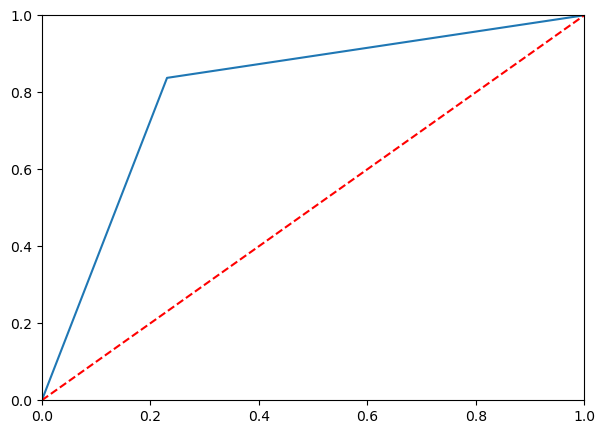

In [97]:
fpr, tpr, threshold = roc_curve(y_train_2,model_valid_pred)
plt.figure(figsize=(7,5))
# plot the ROC curve

plt.plot(fpr, tpr)


# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')
print(roc_auc_score(y_train_2,model_valid_pred))
plt.show()

In [98]:
cm = confusion_matrix(y_train_2,model_valid_pred)
# cm

The confusion matrix provides insight into the model's performance by comparing actual and predicted transported passengers. In this case, the model correctly identified 917 passengers as transported and 830 as not transported, but misclassified 178 passengers as transported when they were actually not transported and 249 passengers as not transported when they were actually transported. Based on this, the model's performance can be evaluated using metrics additional to accuracy, such as precision and recall. In general, the split between passengers transported and not transported is divided between 52% transported and 48 not transported.

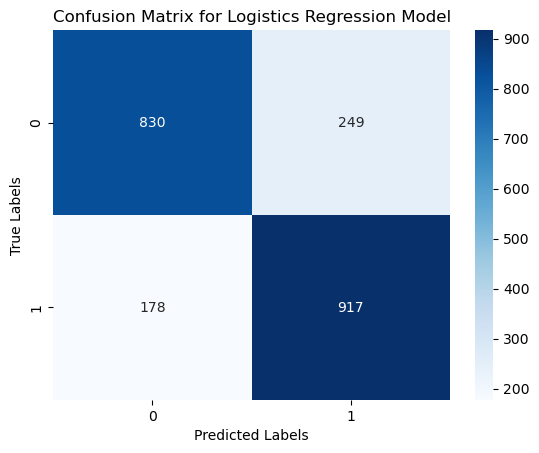

In [99]:
# print confusion matrix
# print('Confusion matrix:\n', cm)

sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

plt.title("Confusion Matrix for Logistics Regression Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [100]:
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [101]:
# RECALL for '0' class 'TNR'
specificity = TN/(TN+FP)
# specificity

The specificity is a measure of how well a model can correctly identify the negative samples. In this case, the specificity for the '0' class is 0.769, indicating that the model can accurately classify 77% of the negative samples.

In [102]:
# RECALL for '1' class 'TPR'
sensitivity = TP/(FN+TP)
# sensitivity

Sensitivity, also known as true positive rate (TPR), is the proportion of actual positive cases that were correctly identified by the model. In this case, it represents the proportion of passengers who were correctly predicted to be transported on a spaceflight out of all the passengers who were actually transported. A value of 0.837 indicates that the model correctly identified 83.7% of the passengers who were actually transported.

**Kappa score:** It is a measure of inter-rater reliability. For logistic regression, the actual and predicted values of the target variable are the raters.

Cohen suggested the Kappa result be interpreted as follows: values ≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.

In [103]:
from sklearn.metrics import cohen_kappa_score
# compute the kappa value
kappa = cohen_kappa_score(y_train_2,model_valid_pred)

# print the kappa value
# print('kappa value:',kappa)

The computed kappa value of 0.606 indicates substantial agreement between the predicted and actual target values beyond what would be expected by chance. Kappa is a measure of inter-rater agreement that takes into account the possibility of agreement occurring by chance alone. A value of 1 indicates perfect agreement, while a value of 0 indicates agreement no better than chance. Therefore, a kappa value of 0.606 is considered to be a good measure of agreement between the predicted and actual target values.

**The model performed well with both training and validation accuracy above 0.80. The specificity of 0.77 and sensitivity of 0.84 suggest that the model is able to predict negative and positive cases with moderate accuracy. The kappa score of 0.60 indicates substantial agreement between the predicted and actual classes. Overall, the model seems to be performing well, but further analysis may be necessary to improve its predictive power.**

<h1>Bibliography </h1>

7 ways to handle missing values in machine learning. (n.d.). Toward Data Science. Retrieved March 11, 2023, from https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

Preprocessing - Categorical Data. (n.d.). W3Schools. Retrieved March 11, 2023, from https://www.w3schools.com/python/python_ml_preprocessing.asp

Brownlee, J. (2018, February 6). Histogram-Based Gradient Boosting Ensembles in Python. Machine Learning Mastery. https://machinelearningmastery.com/histogram-based-gradient-boosting-ensembles/

NIST/SEMATECH e-Handbook of Statistical Methods. (n.d.). Exploratory Data Analysis (EDA). National Institute of Standards and Technology. Retrieved March 11, 2023, from https://www.itl.nist.gov/div898/handbook/eda/section1/eda11.htm
